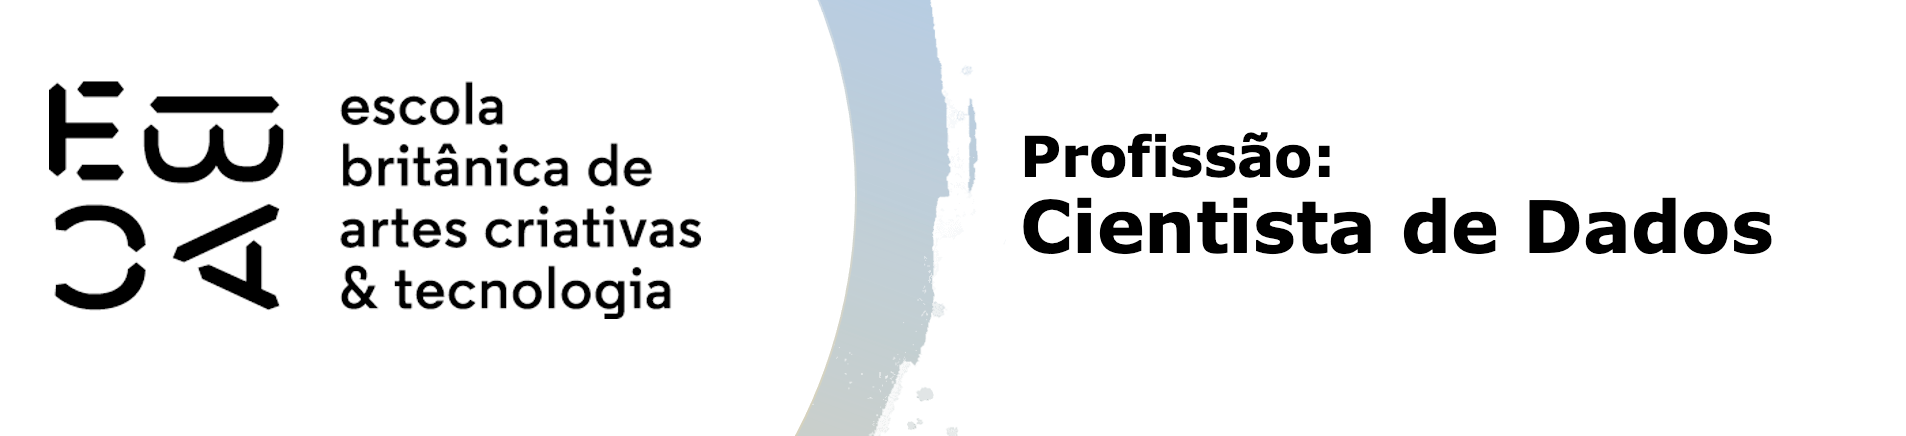

# Regressão III - Tarefa

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [223]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [225]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [226]:
df

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


In [227]:
df.dropna(subset=['tempo_emprego'], inplace=True)

In [228]:
df['tempo_emprego'].isna().sum()

0

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [230]:
df.reset_index(inplace=True)

### Criando a varíavel do log da renda

In [232]:
import numpy as np

df['log_renda'] = np.log(df['renda'])

### Fazendo o split no dataframe original e dropando colunas irrelevantes

In [234]:
holdout_df = df[df['data_ref'] >= '2016-01-01']
holdout_df = holdout_df.drop(columns=['data_ref' , 'index'])
holdout_df.reset_index(inplace=True)
train_df = df[df['data_ref'] < '2016-01-01']
train_df = train_df.drop(columns=['data_ref' , 'index'])

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [236]:
train_df['tempo_emprego_cat'], quebras = pd.qcut(train_df['tempo_emprego'], q=20, retbins=True)

profile_df = train_df.groupby('tempo_emprego_cat').agg(
    num_obs=('tempo_emprego', 'size'),
    mean_log_renda=('log_renda', 'mean'),
    mean_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

C:\Users\Hanga\AppData\Local\Temp\ipykernel_2388\1682420106.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_df = train_df.groupby('tempo_emprego_cat').agg(


In [237]:
profile_df

,tempo_emprego_cat,num_obs,mean_log_renda,mean_tempo_emprego
0,"(0.11699999999999999, 0.682]",25154,8.370907,0.464057
1,"(0.682, 1.195]",25038,8.417388,0.971487
2,"(1.195, 1.767]",24888,8.531471,1.502835
3,"(1.767, 2.364]",24789,8.561743,2.055728
4,"(2.364, 3.049]",25155,8.675957,2.715994
5,"(3.049, 3.63]",24822,8.754188,3.355636
6,"(3.63, 4.195]",24931,8.849051,3.924755
7,"(4.195, 4.693]",25158,8.912516,4.449669
8,"(4.693, 5.356]",24755,8.949442,5.004796
9,"(5.356, 6.044]",24954,9.112963,5.708783


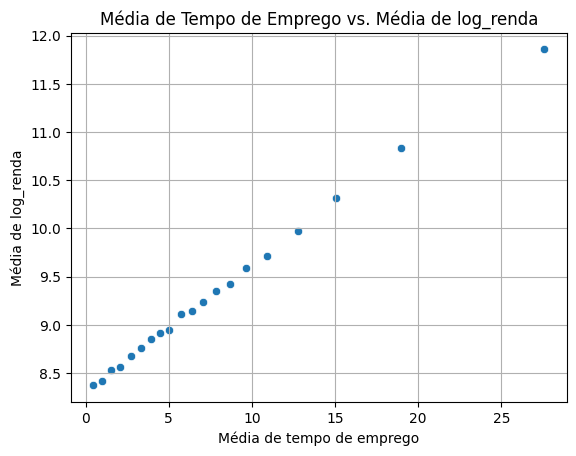

In [238]:
sns.scatterplot(data=profile_df, y='mean_log_renda', x='mean_tempo_emprego')
plt.ylabel('Média de log_renda')
plt.xlabel('Média de tempo de emprego')
plt.title('Média de Tempo de Emprego vs. Média de log_renda')
plt.grid(True)
plt.show()

### Dado esse padrão ao realizarmos a categorização dessa variável contínua, podemos tentar a regressão por categorização.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


#### Definindo a função para fazer a plotagem

In [242]:
def esp_vs_obs(mydata):

    data = mydata.sample(n=1000, random_state=42)
    
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(data['tempo_emprego'], data['log_renda'], "o", label="Dados observados")
    ax.plot(data['tempo_emprego'], res.fittedvalues, "r--.", label="Estimativa OLS")
    ax.plot(data['tempo_emprego'], iv_u, "r--", label = 'Banda de confiança para y')
    ax.plot(data['tempo_emprego'], iv_l, "r--")
    ax.plot(data['tempo_emprego'], m_u, "g:", label='Banda de confiança para a média')
    ax.plot(data['tempo_emprego'], m_l, "g:")
    ax.legend(loc="best")
    plt.show

In [243]:
tab = train_df.merge(profile_df, on='tempo_emprego_cat', how='left')

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [245]:
quebras

array([ 0.11780822,  0.68219178,  1.19452055,  1.76712329,  2.36438356,
        3.04931507,  3.63013699,  4.19452055,  4.69315068,  5.35616438,
        6.04383562,  6.72054795,  7.45753425,  8.22739726,  9.09315068,
       10.18082192, 11.72328767, 13.86575342, 16.54520548, 21.47945205,
       42.90684932])

In [246]:
quebras2 = [ -np.inf,  0.68219178,  1.19452055,  1.76712329,  2.36438356,
        3.04931507,  3.63013699,  4.19452055,  4.69315068,  5.35616438,
        6.04383562,  6.72054795,  7.45753425,  8.22739726,  9.09315068,
       10.18082192, 11.72328767, 13.86575342, 16.54520548, 21.47945205,
       42.90684932]

train_df['tempo_emprego_cat'] = pd.cut(train_df['tempo_emprego'], quebras2)

profile_df = train_df.groupby('tempo_emprego_cat').agg(
    num_obs=('tempo_emprego', 'size'),
    mean_log_renda=('log_renda', 'mean'),
    mean_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

tab = train_df.merge(profile_df, on='tempo_emprego_cat', how='left')

C:\Users\Hanga\AppData\Local\Temp\ipykernel_2388\1546464450.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_df = train_df.groupby('tempo_emprego_cat').agg(


In [247]:
res = sm.OLS(train_df['log_renda'], train_df['tempo_emprego']).fit()
res = smf.ols('log_renda ~ tempo_emprego_cat',data=train_df).fit()
print(f'R-quadrado: {res.rsquared:.2%}')
res.summary()

R-quadrado: 45.67%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 2.209e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:30:01   Log-Likelihood:            -6.7384e+05
No. Observations:              499269   AIC:                         1.348e+06
Df Residuals:                  499249   BIC:                         1.348e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         8.3715      0.006   1403.813      0.000       8.360       8.383
tempo_emprego_cat[T.Interval(0.682, 1.195, closed='right')]       0.0442      0.008      5.299      0.000       0.028       0.060
tempo_emprego_cat[T.Interval(1.195, 1.767, closed='right')]       0.1600      0.008     19.049      0.000       0.144       0.176
tempo_emprego_cat[T.Interval(1.767, 2.364, closed='right')]       0.1899      0.008     22.558      0.000       0.173       0.206
tempo_emprego_cat[T.Interval(2.364, 3.049, closed='right')]       0.3043      0.008     36.369      0.000       0.288       0.321
tempo_emprego_cat[T.Interval(3.049, 3.63, closed='right')]        0.3827      0.008     45.536      0.000       0.366       0.399
tempo_emprego_cat[T.Interval(3.63, 4.195, closed='right')]        0.4776      0.008     56.885      0.000       0.461       0.494
tempo_emprego_cat[T.Interval(4.195, 4.693, closed='right')]       0.5378      0.008     63.969      0.000       0.521       0.554
tempo_emprego_cat[T.Interval(4.693, 5.356, closed='right')]       0.5805      0.008     69.227      0.000       0.564       0.597
tempo_emprego_cat[T.Interval(5.356, 6.044, closed='right')]       0.7412      0.008     88.363      0.000       0.725       0.758
tempo_emprego_cat[T.Interval(6.044, 6.721, closed='right')]       0.7712      0.008     91.909      0.000       0.755       0.788
tempo_emprego_cat[T.Interval(6.721, 7.458, closed='right')]       0.8676      0.008    103.531      0.000       0.851       0.884
tempo_emprego_cat[T.Interval(7.458, 8.227, closed='right')]       0.9764      0.008    115.903      0.000       0.960       0.993
tempo_emprego_cat[T.Interval(8.227, 9.093, closed='right')]       1.0623      0.008    126.596      0.000       1.046       1.079
tempo_emprego_cat[T.Interval(9.093, 10.181, closed='right')]      1.2115      0.008    144.623      0.000       1.195       1.228
tempo_emprego_cat[T.Interval(10.181, 11.723, closed='right')]     1.3417      0.008    159.809      0.000       1.325       1.358
tempo_emprego_cat[T.Interval(11.723, 13.866, closed='right')]     1.5992      0.008    190.244      0.000       1.583       1.616
tempo_emprego_cat[T.Interval(13.866, 16.545, closed='right')]     1.9446      0.008    232.660      0.000       1.928       1.961
tempo_emprego_cat[T.Interval(16.545, 21.479, closed='right')]     2.4607      0.008    292.253      0.000       2.444       2.477
tempo_emprego_cat[T.Interval(21.479, 42.907, closed='right')]     3.4852      0.008    415.574      0.000       3.469       3.502
==============================================================================
Omnibus:      

### Agora testaremos com uma função de X

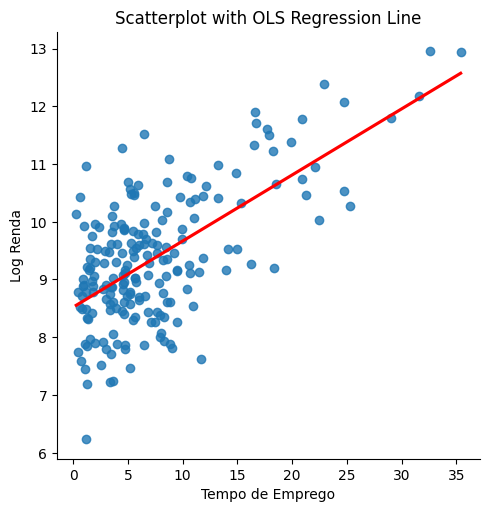

In [249]:
sampled_df = train_df.sample(n=200, random_state=99)

sns.lmplot(x='tempo_emprego', y='log_renda', data=sampled_df, ci=None, line_kws={'color': 'red'})
plt.xlabel('Tempo de Emprego')
plt.ylabel('Log Renda')
plt.title('Scatterplot with OLS Regression Line')
plt.show()

In [ ]:
C1=6

train_df['tempo_emprego_seg_1'] = (train_df['tempo_emprego']<=C1)*train_df['tempo_emprego'] + (train_df['tempo_emprego']>C1)*C1
train_df['tempo_emprego_seg_2'] = (train_df['tempo_emprego']<=C1)*0 + (train_df['tempo_emprego']>C1)*(train_df['tempo_emprego']-C1)


In [ ]:
res = sm.OLS(train_df['log_renda'], train_df['tempo_emprego']).fit()
res = smf.ols('log_renda ~ tempo_emprego_seg_1 + tempo_emprego_seg_2',data=train_df).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

res.summary()

In [ ]:
sampled_df = train_df.sample(n=200, random_state=99)

sns.lmplot(x='tempo_emprego', y='log_renda', data=sampled_df)
plt.xlabel('Tempo de Emprego')
plt.plot(train_df['tempo_emprego_seg_2'], res.fittedvalues, "r--.", label="Estimativa OLS")
plt.ylabel('Log Renda')
plt.title('Scatterplot with OLS Regression Line')
plt.show()

#### Ambos os modelos de categorização e segmentação apresentaram um desempenho bem parecido. Também tive dificuldades com a plotagem